In [1]:
# Magic statements.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from pprint import pprint
import time

# Import graph libraries.
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# Import main modules, packages, and third party libraries.
import numpy as np; from numpy import nan
import pandas as pd
import seaborn as sns; sns.set()

# Import scikit-learn classes: datasets.
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

# Import scikit-learn classes: preprocessing step utility functions.
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA                # Unsupervised Machine Learning tasks: feature reduction, dimensionality reduction
from sklearn.mixture import GaussianMixture          # Unsupervised Machine Learning tasks: clustering
from sklearn.manifold import Isomap                  # Unsupervised Machine Learning tasks: feature reduction, dimensionality reduction

# Import scikit-learn classes: models (Estimators).
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

# Import scikit-learn classes: preprocessing.
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import Imputer
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsClassifier

# Import scikit-learn classes: Hyperparameters Validation utility functions.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Import scikit-learn classes: model's evaluation step utility functions.
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [3]:
from utils.grid_search_cv_utils import inner_vs_outer_cv
from utils.load_pittburgh_dataset import load_brdiges_dataset

In [4]:
# Global starting variables.
SEED = 42
RANDOM_STATE = 1
NUM_TRIALS = 2

# Instantiate, or create, a random generator object.
rng = np.random.RandomState(seed=SEED)

# Set seed for numpy module.
np.random.seed(seed=SEED)

In [5]:
dataset = load_brdiges_dataset()

Dataset shape: (108, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, E1 to E109
Data columns (total 12 columns):
RIVER       108 non-null object
LOCATION    108 non-null object
ERECTED     108 non-null int64
PURPOSE     108 non-null object
LENGTH      108 non-null object
LANES       108 non-null object
CLEAR-G     108 non-null object
T-OR-D      108 non-null object
MATERIAL    108 non-null object
SPAN        108 non-null object
REL-L       108 non-null object
TYPE        108 non-null object
dtypes: int64(1), object(11)
memory usage: 11.0+ KB
None
RIVER  :  ['A', 'M', 'O', 'Y']
PURPOSE  :  ['AQUEDUCT', 'HIGHWAY', 'RR', 'WALK']
CLEAR-G  :  ['?', 'G', 'N']
T-OR-D  :  ['?', 'DECK', 'THROUGH']
MATERIAL  :  ['?', 'IRON', 'STEEL', 'WOOD']
SPAN  :  ['?', 'LONG', 'MEDIUM', 'SHORT']
REL-L  :  ['?', 'F', 'S', 'S-F']
TYPE  :  ['?', 'ARCH', 'CANTILEV', 'CONT-T', 'NIL', 'SIMPLE-T', 'SUSPEN', 'WOOD']
Before (108, 12)
After (88, 12)
RIVER  :  ['A', 'M', 'O', 'Y']
PURPOSE  :  ['AQUEDUCT',

In [6]:
columns = dataset.columns
target_col = 'T-OR-D'

y = np.array(list(map(lambda x: 0 if x == 1 else 1, dataset[target_col].values)), dtype=int)
print(dataset[target_col].value_counts())
X = dataset.loc[:, dataset.columns != target_col]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=RANDOM_STATE)

2    57
1    13
Name: T-OR-D, dtype: int64


Gaussian naive Bayes accuracy score: 0.6111111111111112
Gaussian naive Bayes accuracy score (percentage): 61.11%


Text(89.18, 0.5, 'true value')

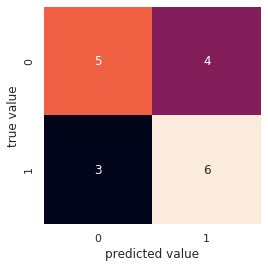

In [7]:
model = GaussianNB()           # 2. Instantiate the model w/ hyperparameters.
model.fit(Xtrain, ytrain)      # 3. Fit the model to data. Notice y is not specified.          

y_model = model.predict(Xtest) # 4. Predict sample's class labels
print('Gaussian naive Bayes accuracy score:', accuracy_score(ytest, y_model))
print(f"Gaussian naive Bayes accuracy score (percentage): {accuracy_score(ytest, y_model)*100:.2f}%")

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

[*] inner_vs_outer_cv running...
Average difference of -0.000293 with std. dev. of 0.000000.


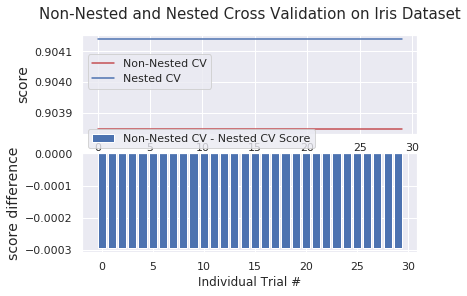

[*] inner_vs_outer_cv done.


In [8]:
param_grid = {
    'penalty': ['l2'],                                # ['l1', 'l2', 'elastic', 'none'],
    # 'multi_class': ['multinomial', 'ovr'],
    'C': [0.001, 0.01, 0.1, 1.0],
    'solver':['newton-cg', 'lbfgs', 'sag', 'saga',],  # ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga',],
}

estimator = LogisticRegression()

assert inner_vs_outer_cv is not None, 'inner_vs_outer_cv is None'

inner_vs_outer_cv( 
    estimator=estimator,
    Xtrain=Xtrain, ytrain=ytrain,
    param_grid=param_grid,
    Xtest=Xtest, ytest=ytest,
    num_trials=NUM_TRIALS,
    random_state=RANDOM_STATE,
    n_splits_i=3,
    n_splits_o=3,
    verbose=0
)

[*] inner_vs_outer_cv running...
Average difference of 0.018937 with std. dev. of 0.000000.


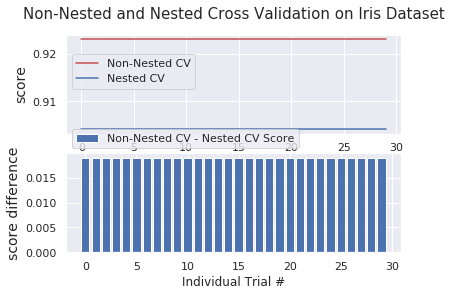

[*] inner_vs_outer_cv done.


In [9]:
param_grid = {
 'n_neighbors' : [1,2,3,5,7,9,10,20]
}

estimator = KNeighborsClassifier()

assert inner_vs_outer_cv is not None, 'inner_vs_outer_cv is None'

inner_vs_outer_cv( 
    estimator=estimator,
    Xtrain=Xtrain, ytrain=ytrain,
    param_grid=param_grid,
    Xtest=Xtest, ytest=ytest,
    num_trials=NUM_TRIALS,
    random_state=RANDOM_STATE,
    n_splits_i=3,
    n_splits_o=3,
    verbose=0
)

- (GridSearchCV) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- (train_test_split) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split
- (Nested versus non-nested cross-validation) https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py
- (mixture) https://scikit-learn.org/stable/modules/mixture.html#gmm